In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta

In [2]:
random.seed(42)

n = 1000  # Number of entries
Categories = ['health', 'family', 'food', 'travel', 'music', 'fitness']
Country = ['US','UK','AUS','France','Italy','Brazil']
Device = ['Android','IOS','PC']
Chekmark = ['Blue','Yellow','Company','Official','State_affiliated','None'] 
Media = ['Img','Vid','Both','None']

In [3]:
def random_dates(start, end, n):
    start_u = start.timestamp()
    end_u = end.timestamp()
    return [datetime.fromtimestamp(random.uniform(start_u, end_u)) for _ in range(n)]

start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 1, 1)

# Create random data
data = {
    'Date': random_dates(start_date, end_date, n),  # Random dates between the start and end date
    'Category': [random.choice(Categories) for _ in range(n)],  # Random categories
    'Country': [random.choice(Country) for _ in range(n)],  # Random countries
    'Device': [random.choice(Device) for _ in range(n)],  # Random devices
    'Checkmark': [random.choice(Chekmark) for _ in range(n)],  # Random checkmarks
    'Likes': [random.randint(0, 10000) for _ in range(n)],  # Random integers for likes
    'Char_limit': [random.randint(1, 280) for _ in range(n)],  # Random integers for X char limit
    'Media':[random.choice(Media)for _ in range(n)]
}
df = pd.DataFrame(data)

# Introduce some NaN values in the DataFrame
nan_indices = random.sample(range(n), 10)  
df.loc[nan_indices, 'Likes'] = np.nan

# Introduce a few null values in Category
null_indices = random.sample(range(n), 5) 
df.loc[null_indices, 'Category'] = None


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1000 non-null   datetime64[ns]
 1   Category    995 non-null    object        
 2   Country     1000 non-null   object        
 3   Device      1000 non-null   object        
 4   Checkmark   1000 non-null   object        
 5   Likes       990 non-null    float64       
 6   Char_limit  1000 non-null   int64         
 7   Media       1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 62.6+ KB


In [5]:
df['Likes'].fillna(df['Likes'].mean(),inplace=True)
df['Char_limit'].fillna(df['Char_limit'].mean(),inplace=True)

C:\Users\khogeta\AppData\Local\Temp\ipykernel_20784\1804512425.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Likes'].fillna(df['Likes'].mean(),inplace=True)
C:\Users\khogeta\AppData\Local\Temp\ipykernel_20784\1804512425.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [6]:
mode = df['Category'].value_counts().idxmax()
df['Category'].fillna(mode,inplace=True)

C:\Users\khogeta\AppData\Local\Temp\ipykernel_20784\3734740325.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Category'].fillna(mode,inplace=True)


In [7]:
df.describe()

,Date,Likes,Char_limit
count,1000,1000.000000,1000.000000
mean,2022-01-18 20:57:50.128639744,5097.426263,142.100000
min,2020-01-01 14:14:01.930364,1.000000,1.000000
25%,2021-01-20 11:07:01.430257920,2723.000000,71.000000
50%,2022-02-06 10:54:28.955240192,5097.426263,146.000000
75%,2023-01-09 23:20:18.206306048,7707.000000,212.000000
max,2023-12-31 20:46:05.155849,9978.000000,280.000000
std,NaN,2864.298526,81.424148


In [8]:
df.head(10)

,Date,Category,Country,Device,Checkmark,Likes,Char_limit,Media
0,2022-07-23 05:51:40.540058,health,US,IOS,Blue,4117.0,174,None
1,2020-02-06 12:58:37.636059,fitness,US,Android,None,3327.0,31,None
2,2021-02-05 19:37:40.869461,food,France,PC,Blue,7259.0,31,Both
3,2020-11-22 02:39:40.760821,music,Italy,PC,Blue,3695.0,183,Vid
4,2022-12-11 23:37:35.952409,fitness,France,Android,Official,6025.0,79,None
5,2022-09-15 16:47:26.977189,food,UK,PC,Official,9640.0,275,Img
6,2023-07-27 12:23:03.703210,health,UK,PC,None,8955.0,55,Both
7,2020-05-07 01:25:23.618344,travel,Italy,PC,Official,9885.0,65,None
8,2021-09-08 11:16:00.067600,food,AUS,PC,Yellow,3218.0,250,None
9,2020-02-13 12:48:34.928555,family,US,IOS,Official,3170.0,120,Both


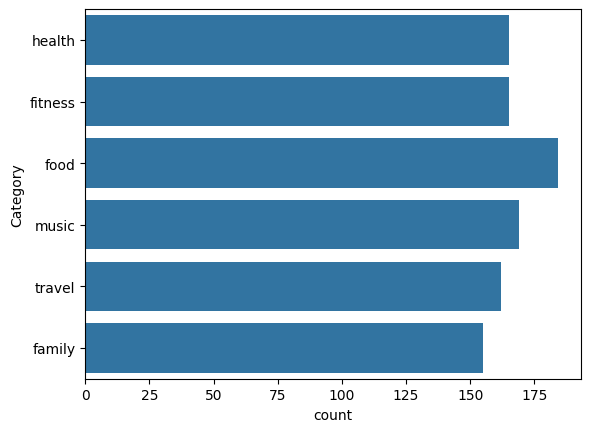

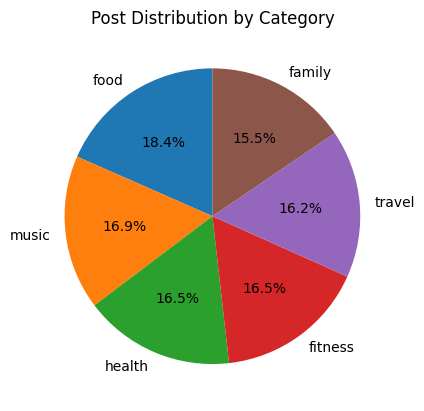

In [42]:
sns.countplot(df['Category'])
plt.show()
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Post Distribution by Category')
plt.show()

most tweets are food related at 18.4% and 2nd is music related at 16.9% with the least number of tweets being family related at 15.5% tweets

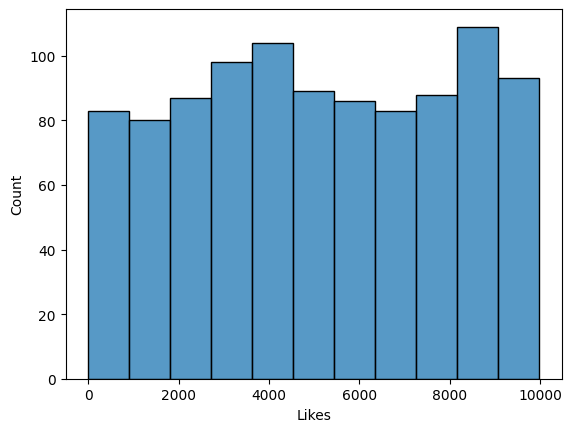

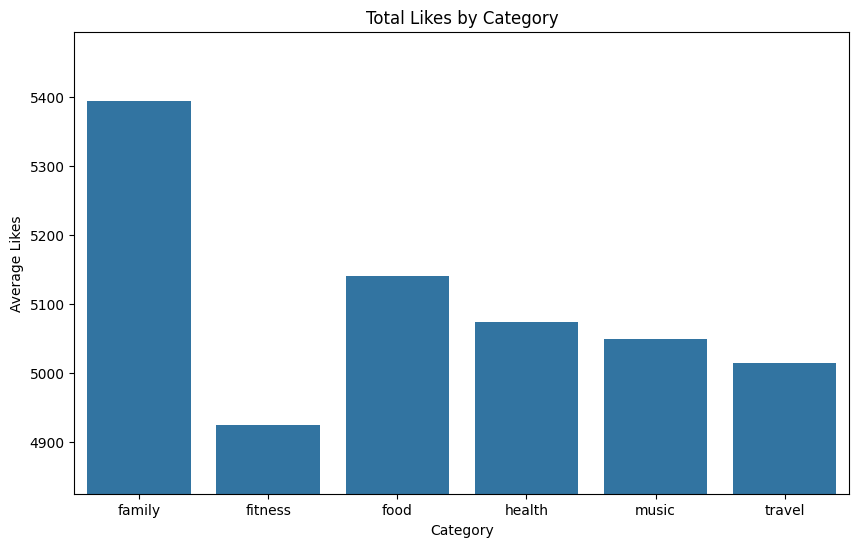

In [73]:
# Histogram plot 
sns.histplot(df.Likes)
plt.show()

category_popularity = df.groupby('Category')['Likes'].mean().reset_index()

# Bar plot 
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Likes', data=category_popularity)
plt.title('Total Likes by Category')
plt.xlabel('Category')
plt.ylabel('Average Likes')

plt.ylim(category_popularity['Likes'].min() - 100, category_popularity['Likes'].max() + 100)

plt.show()


highest average likes are from family related tweets with food being second and fitness being last 

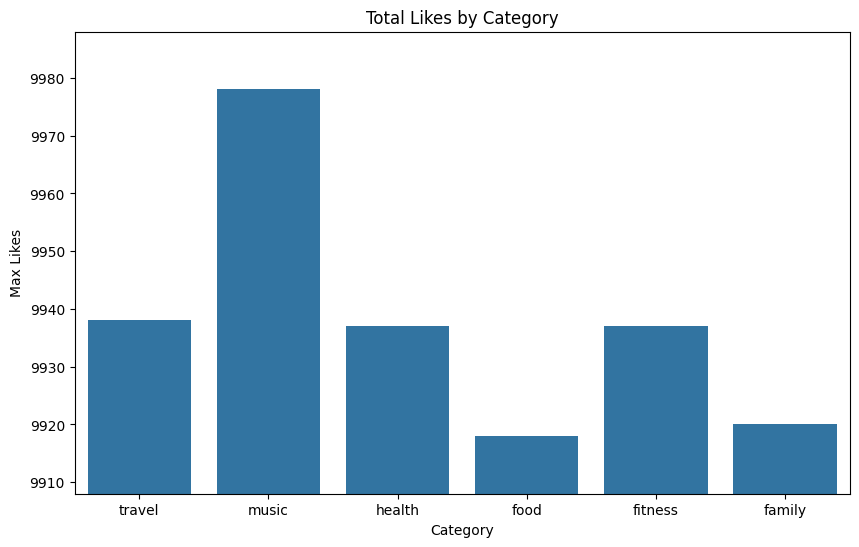

In [67]:
Max_cat = df.groupby('Category')['Likes'].max().sort_index(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Likes', data=Max_cat)
plt.ylim(Max_cat['Likes'].min() - 10, Max_cat['Likes'].max() + 10)  # Adjust the limits
plt.title('Total Likes by Category')
plt.xlabel('Category')
plt.ylabel('Max Likes')
plt.show()


tweet with most likes is music related while the lowest liked tweet was in the food category but the values are very close to one another thus this visual is negligible

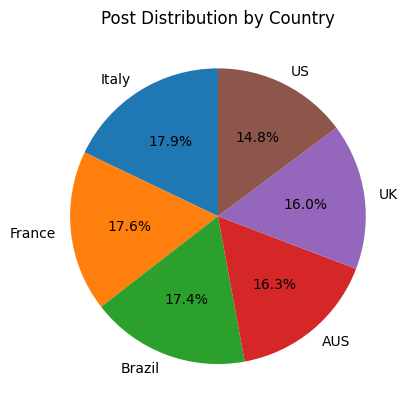

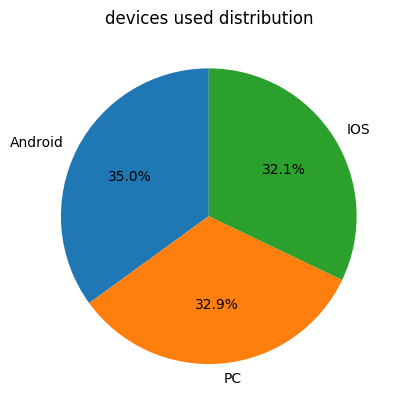

In [77]:
plt.pie(df['Country'].value_counts(), labels=df['Country'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Post Distribution by Country')
plt.show()
plt.pie(df.Device.value_counts(),labels = df.Device.value_counts().index,autopct='%1.1f%%',startangle=90 )
plt.title('devices used distribution')
plt.show()

most tweets are from italy and least tweets are from the us (surprisingly!).
most tweets are sent by android and IOS being least used device.

c:\Users\khogeta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


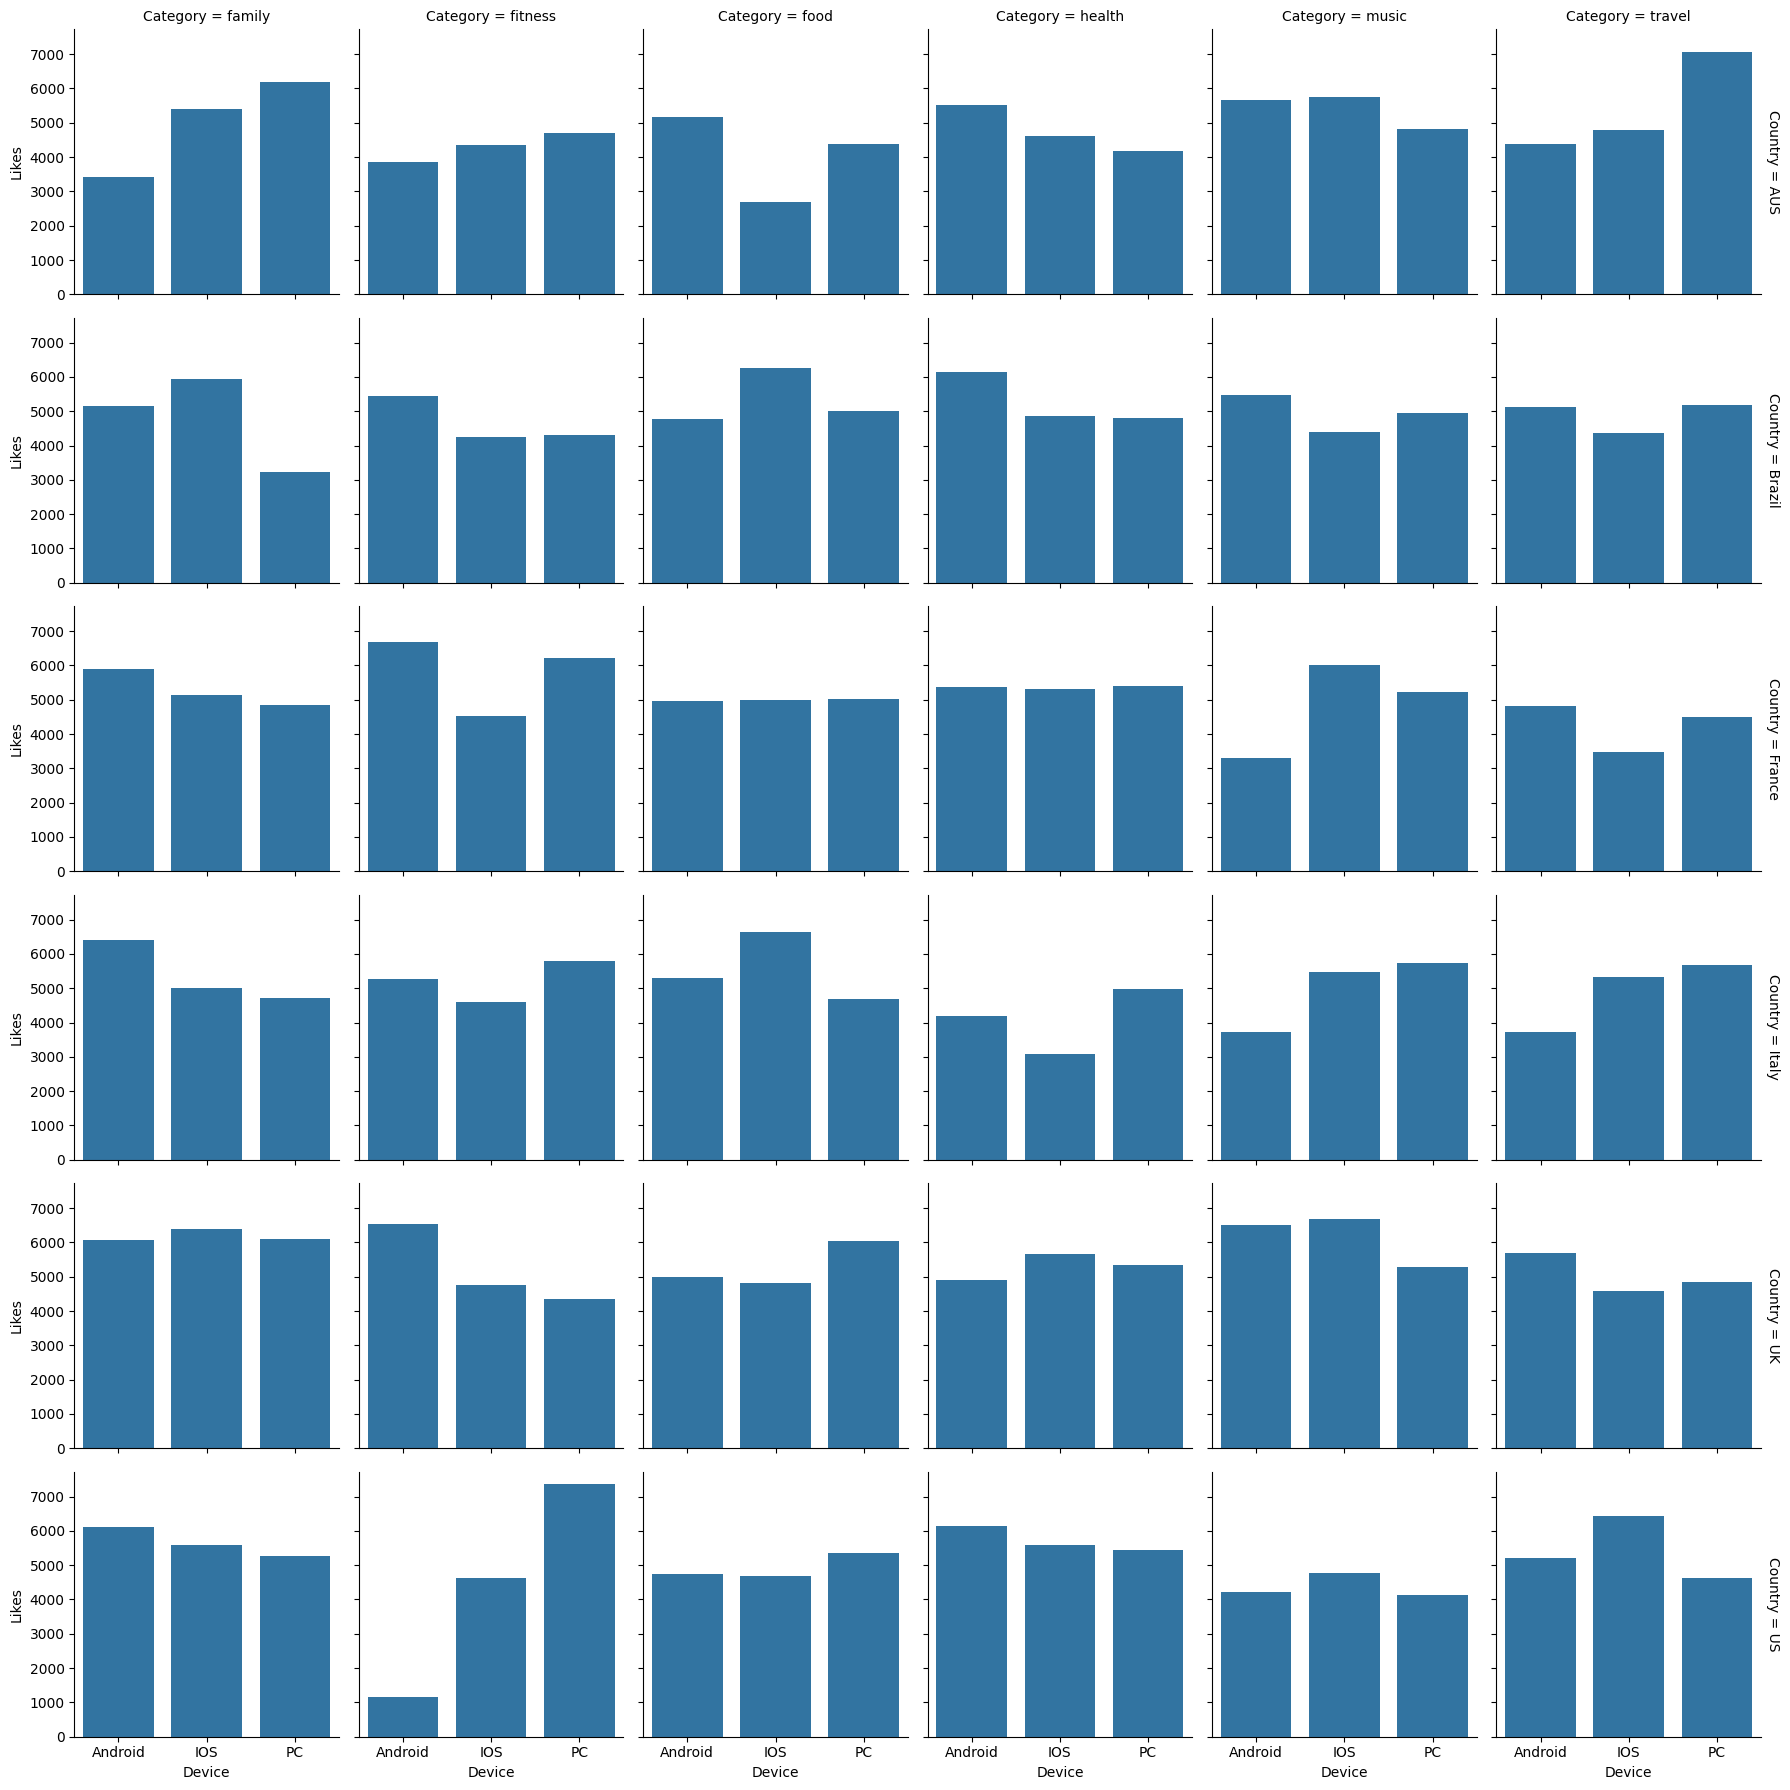

In [10]:
tweets_by_all_cats = df.groupby(['Category', 'Country', 'Device'])['Likes'].mean().reset_index()

# FacetGrid
g = sns.FacetGrid(tweets_by_all_cats, col="Category", row="Country", margin_titles=True)
g.map(sns.barplot, "Device", "Likes")

plt.show()

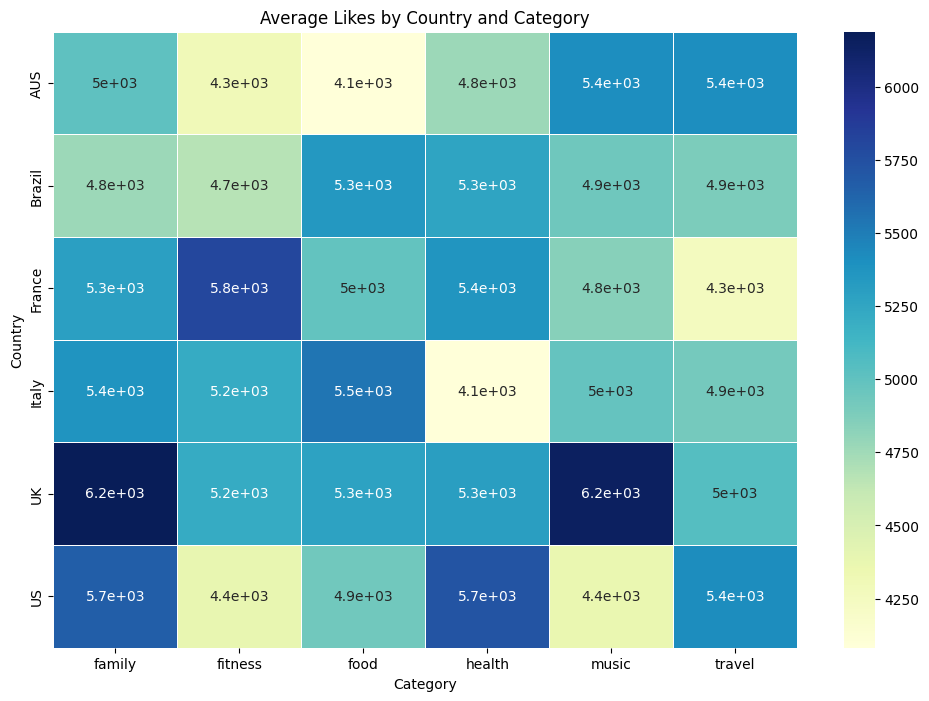

In [83]:
pivot_table = tweets_by_all_cats.pivot_table(index='Country', columns='Category', values='Likes')

# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title('Average Likes by Country and Category')
plt.show()


<Figure size 1200x600 with 0 Axes>

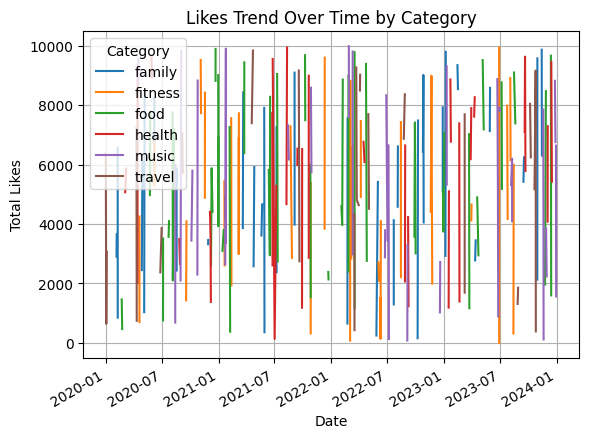

In [84]:
# Converting Date to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Grouping by Date and Category
time_trends = df.groupby(['Date', 'Category'])['Likes'].sum().unstack()

# Line plot
plt.figure(figsize=(12, 6))
time_trends.plot()
plt.title('Likes Trend Over Time by Category')
plt.xlabel('Date')
plt.ylabel('Total Likes')
plt.legend(title='Category')
plt.grid(True)
plt.show()


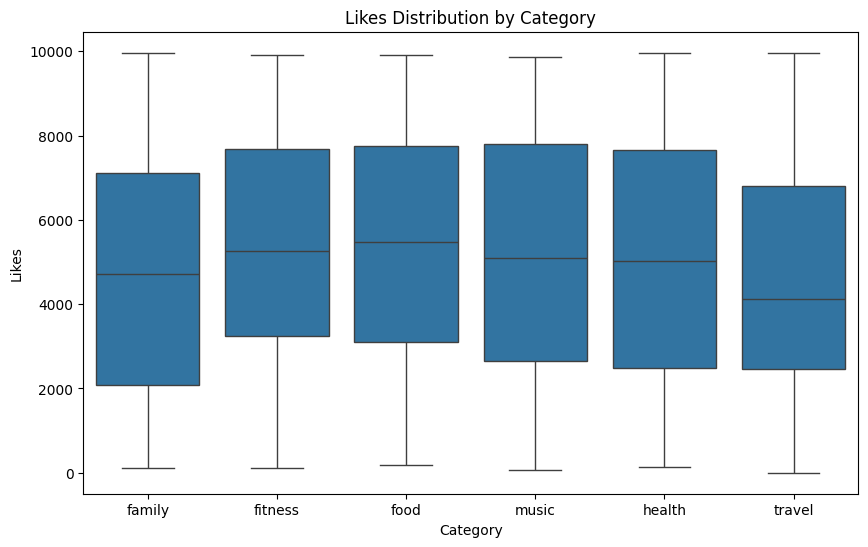

In [53]:
# Box plot showing the distribution of likes by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Likes', data=df)
plt.title('Likes Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Likes')
plt.show()


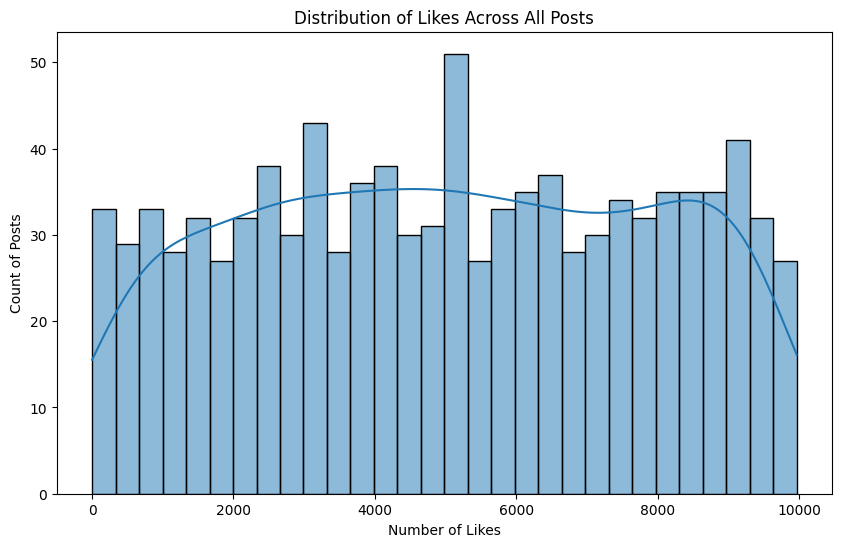

In [56]:
# Histogram of likes across all categories
plt.figure(figsize=(10, 6))
sns.histplot(df['Likes'], bins=30, kde=True)
plt.title('Distribution of Likes Across All Posts')
plt.xlabel('Number of Likes')
plt.ylabel('Count of Posts')
plt.show()


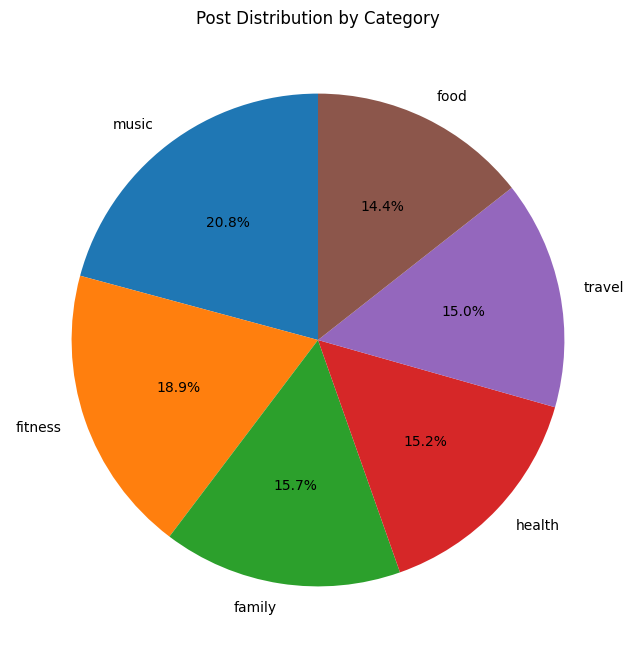

In [61]:
# Counting the number of posts per category
category_counts = df['Category'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Post Distribution by Category')
plt.show()


Greatest average is food while greatest value is music category, vast majority of likes are in the 4000s range and the top 3 tweet categories are music , fitness and family respectively 

The tweet would has the highest propability of being an absolute banger is a tweet about food as it is the lowest occurence while having the highest average of likes and 2nd higest likes overall

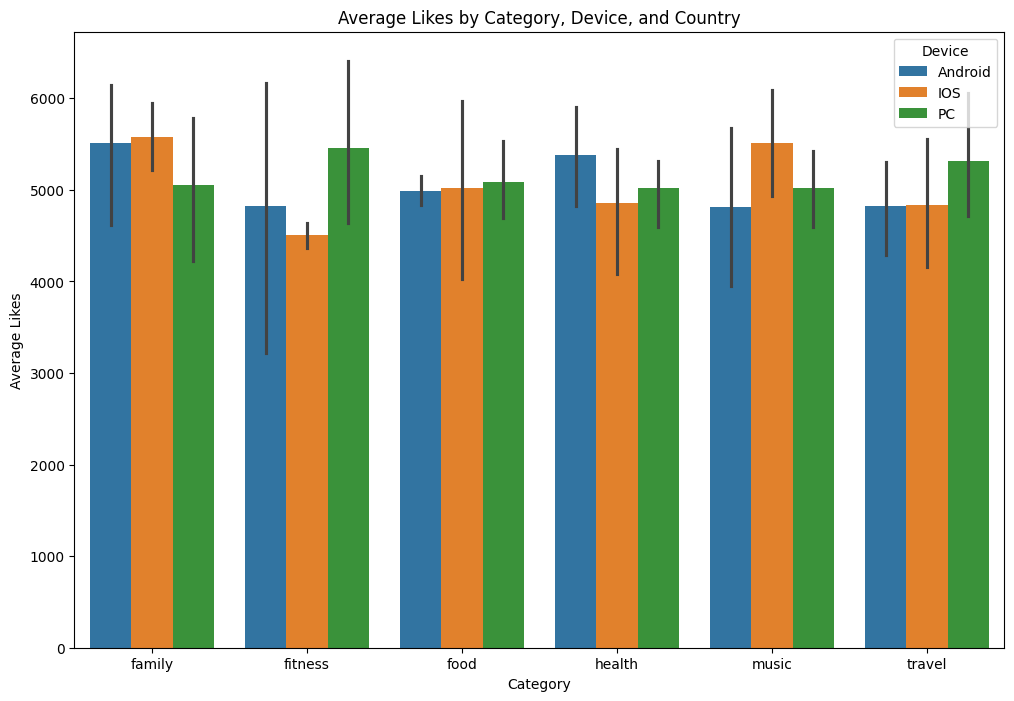

In [14]:
# Grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Likes', hue='Device', data=tweets_by_all_cats)
plt.title('Average Likes by Category, Device, and Country')
plt.xlabel('Category')
plt.ylabel('Average Likes')
plt.legend(title='Device')
plt.show()


the best combination of tweets is likely from an android as it has the highest number of users, and tweeted from italy as it has the highest number of tweets thus more likely for people to see and finally about the music category as it's tweets has the highest number of likes.